# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1451.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.52e-45
Time:                        16:24:25   Log-Likelihood:                 12.270
No. Observations:                  50   AIC:                            -16.54
Df Residuals:                      46   BIC:                            -8.891
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9699      0.067     73.875      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.45243457  4.90050768  5.31526484  5.67462715  5.96448391  6.18101089
  6.33129868  6.43218771  6.50750143  6.58413218  6.68762285  6.83797024
  7.04633968  7.31323057  7.62839433  7.97251823  8.3203984   8.64508077
  8.92228953  9.13441558  9.27340967  9.34210486  9.35375106  9.32983809
  9.29656498  9.28053555  9.30438746  9.38307292  9.52140206  9.71325269
  9.9425761  10.18603385 10.41683221 10.60912428 10.74225658 10.80416234
 10.79334404 10.71911947 10.6000908  10.46108836 10.32909101 10.22879366
 10.17854991 10.18735665 10.25337587 10.36423665 10.49906765 10.63192626
 10.73606082 10.78830591]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.75928624 10.6210437  10.38946569 10.10075761  9.80257853  9.54237253
  9.35575279  9.25778221  9.23928551  9.26909564]


## Plot comparison

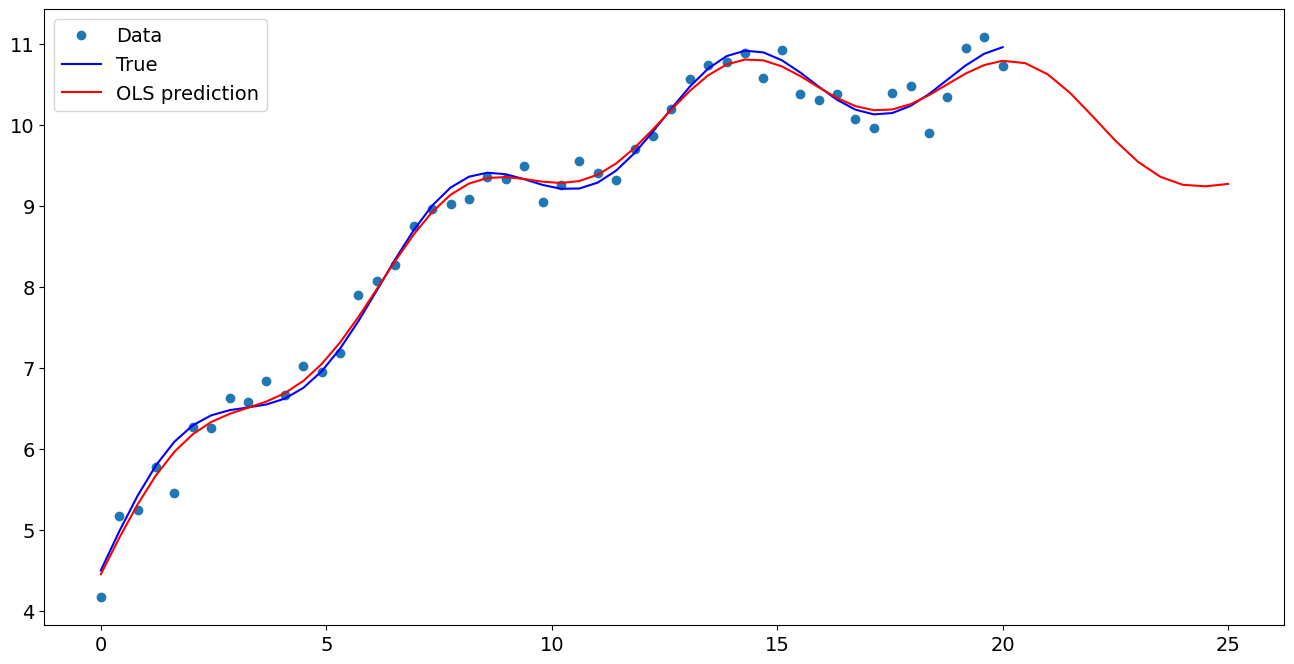

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.969883
x1                  0.505280
np.sin(x1)          0.405124
I((x1 - 5) ** 2)   -0.020698
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.759286
1    10.621044
2    10.389466
3    10.100758
4     9.802579
5     9.542373
6     9.355753
7     9.257782
8     9.239286
9     9.269096
dtype: float64